### USA Housing Prices

**About dataset and Objective:** The dataset is about USA housing prices, using which we have to predict the price of a house.<br/>

**Attributes:**  The dataset has the following attributes:
1. Avg. Area Income<br/>
2. Avg. Area House Age<br/>
3. Avg. Area Number of Rooms<br/>
4. Avg. Area Number of Bedrooms<br/>
5. Area Population<br/>
6. Price<br/>
7. Address<br/>

**Importing packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.getcwd()

'C:\\Users\\xsmaddurve\\Downloads\\Chaitanya_Pratice\\Linear_Regression\\Assignment'

In [2]:
data = pd.read_csv(os.getcwd() + r"\attachment_USA_Housing_lyst2290.csv")
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [3]:
data.shape

(5000, 7)

No.of Rows:5000, No.of Columns: 7
    

In [4]:
data.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

### Question: Perform Descriptive Statistics on the dataset

In [5]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Question: Remove missing values from the data frame if any

In [6]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

###  Question: Perform EDA and find any correlation

**Correlation**

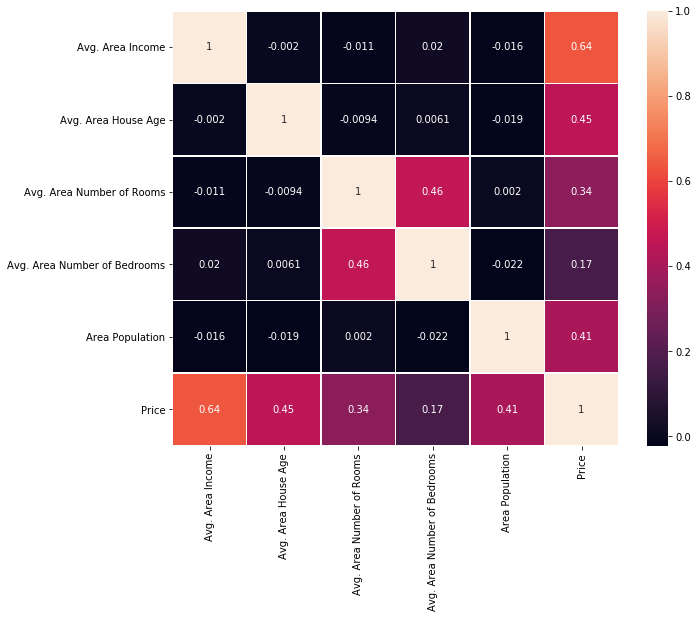

In [7]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, linewidths=.5,)
plt.show()

**Observations:** From the above plot, it is evident that Avg.Area Number of Rooms and Avg. Area number of Bedrooms are correlated to each other. Target variable is moderately correlated with income 

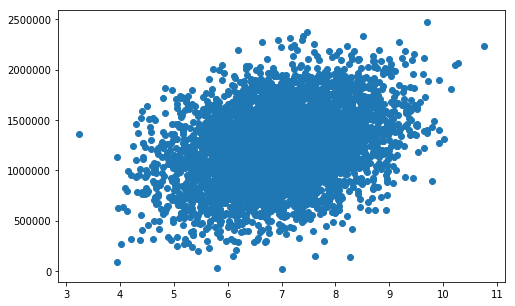

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(data['Avg. Area Number of Rooms'],data['Price'])
plt.show()

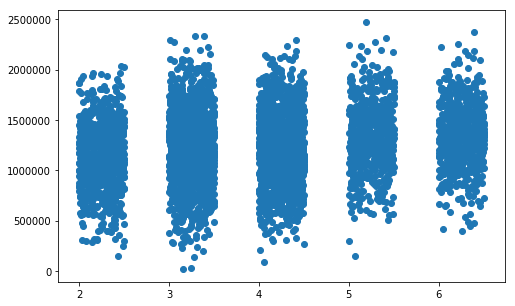

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(data['Avg. Area Number of Bedrooms'],data['Price'])
plt.show()

**Observations:** From the above two graphs, we can more or less say that the independent variable 'Number of Bedrooms' has little or no effect on Housing prices compared to the variable 'Number of rooms', which seems to be linearly associated with housing prices.

**Let's check distribution of each variable**

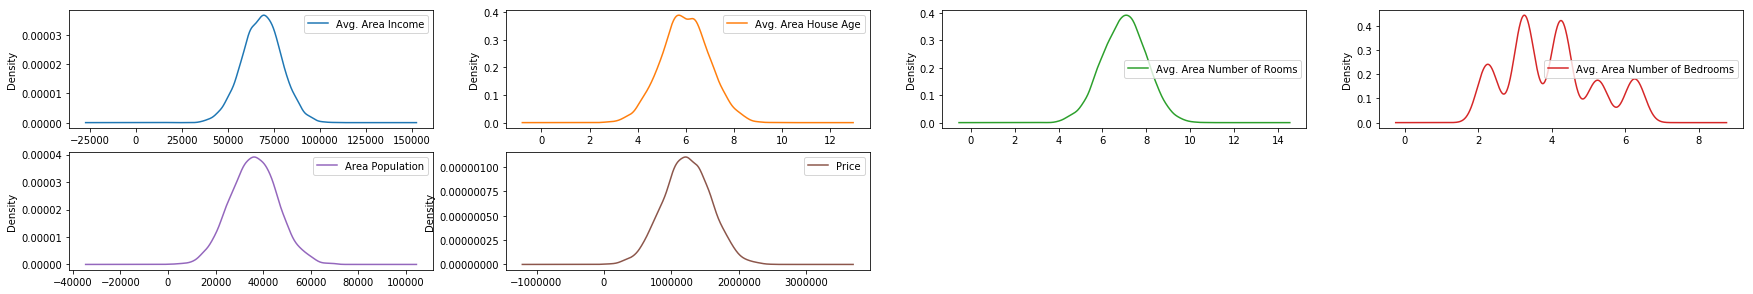

In [10]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize = (30,10))
plt.show()

**Target Variable**

In [11]:
feature=data.drop(['Price','Address'],axis=1).values
target =data['Price'].values

**Standaridization**

In [20]:
from sklearn.preprocessing import minmax_scale
X = minmax_scale(feature)


array([[0.68682217, 0.44198584, 0.50150158, 0.46444444, 0.3299422 ],
       [0.68352073, 0.48853836, 0.46450137, 0.24222222, 0.57596801],
       [0.48373705, 0.46860901, 0.70135011, 0.69555556, 0.52858204],
       ...,
       [0.50713527, 0.67002636, 0.20853446, 0.02888889, 0.47651494],
       [0.55841872, 0.4203891 , 0.51757886, 0.76444444, 0.61128233],
       [0.53071451, 0.48699729, 0.47267788, 0.46      , 0.66708815]])

**Data Partition**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=101)

### Question: Perform Regression using Linear Regression and analyse the metrics

In [14]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=True)
model = reg.fit(X_train,y_train)
predict = model.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
print("Test:", r2_score(y_test,predict))

Test: 0.918506094536362


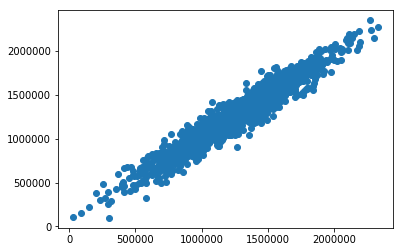

In [16]:
plt.scatter(y_test ,predict)
plt.show()

**Residual histogram**

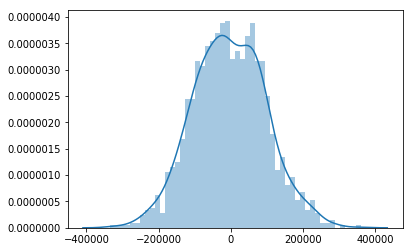

In [17]:
sns.distplot((y_test-predict),bins=50);
plt.show()

**Regression Evaluation Metrics**

In [18]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 81257.5579585598
MSE: 10169125565.897635
RMSE: 100842.08231635061
